                                                               **University Of London**

                                             HR Analytics: Job Change of Data Scientists Project Proposal
    
                                                                      March 28, 2022


**1 Aims, objectives and background**

**1.1 Introduction**

The topic of HR recruitment has been one of the hottest topics in the industry. Companies want to recruit the best talents with the least amount of spendings in order to maximize revenues. Being a data scientist in a company we have been tasked to explore what value could be added to the HR department when recruiting other data scientist aboard. HR had asked to find the most willing data scientist that have the potential to change their job in order to contact them for the job offering. We extend our general exploration from last paper and take an in-depth approach to be able to classify if a potential candidate is willing to change his job and what are the important factors that contribute to that decision. We will build our analysis on some machine learning algorithms such as logistic regression and random forests. We also include the use statistical techniques such as the Chi- Squared and ANOVA tests. 

In this report there is a good investment in balancing out the dataset using undersampling and oversampling techniques and a comparison between both. We also touch on the topics of model performance based on precision, recall and the F1-score.

**1.2 Aims and objectives**

Within this project, I would like to explore which features play a role in the decision of moving from a company for an employee. First of all, it is of great interest to me to extend the exploration from last report and build a more rigorous approach than just data visualizations and descriptive statistics. 

I focus my analysis on using hypothesis testing techniques such as the Chi-Squared and ANOVA test to select the most contributing categorical and numerical features. I explore what techniques of variable encoding is suitable for my hypothesis testing. I furthermore start to explore the problems that arise due to having an imbalanced target variable and try to balance the data using undersampling and oversampling techniques. I also compare model performance before and after balancing the data and how it is crucial to do so to get a better performing model. 

Lastly, a comparison between two different machine learning models is made which is the logistic regression model and the random forest ensemble model in the same dataset setting.



**1.3 Data**

**1.3.1  Dataset**

The dataset is obtained from [Kaggle][kgl] website which is compiled by [Möbius][mbs]. The dataset is a compilation of HR data which are collected by a company that offers data science specific courses. Each observation is an entry for a person enrolled in the data science course provided in the company. The company has collected many features such as *education_level*, *city_development_index, major_discipline* and others. The dataset has enrolled persons from 123 different *cities* which are indicated by city_(number), moreover each *city* (Char) has a *city_development_index* (Float)which indicates on how much the *city* is developed ranging from 0 the lowest value till 1 the highest value. The dataset however is the processed version which we have already processed in the first report in which null values have been removed, string values have been sanitized, categories have been well defined, etc. The size of the data is 19158 records before preprocessing and 9607 records after data processing and cleaning.

[kgl]: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

[mbs]: https://www.kaggle.com/arashnic


**1.4 Methods**

**1.4.1 Feature Selection**

We can say that our dataset is quite big in terms of features (columns) & data points (rows). Thus, we will have some unneeded features that will not have a significant contribution for the class label which in turn will affect our analysis results for example the performance metrics of our chosen models. Unneeded features in our dataset can sometimes let the model to misclassify the data points. When we come to the data points (rows), since we have uneeded features thus we have some data points missclassified so they won't help us during our analysis pipeline. Unfortunately they became misleading and redundant. Here comes the importance of Feature Selection Methods to help us to determine which feature has highest importance. There are 2 types of features in our dataset: categorical features and numerical features. Each type of them has different techniques to determine the feature's importance

**1.4.1.2 Categorical Feature Selection**

In order to determine the categorical features' importance, there are many techniques:

- Chi-Square test 

- Information Gain

And many others to mention, but we have chosen the Chi-Square test to apply it on our dataset. Chi-Square works by calculating the chi-square value using the observed and the expected values for each feature then sums all these chi-square values to get the best score and keep repeating this process by passing different features each time until we find the best score which means that these features have an impact on the response variable.

**1.4.1.3 Numerical Feature Selection**

- ANOVA test

- Kendall’s rank coefficient

And many others to mention, but we have chosen the ANOVA test to apply it on our dataset. ANOVA test is the Analysis of Variance. It checks if there is a significant difference between groups of data or not. ANOVA test is based on the hypothesis testing by assuming there is no difference (null hypothesis) or there is a difference (alternative hypothesis) between means.

**1.4.2 Logistic Regression**

Logistic Regression is a technique used to produce the probability. It is concerned only with binary outcome. If the resulted probability bigger than 0.5 then this data point belongs to class 1 and if less than 0.5 then this data point belongs to class 0. We can see that this algorithm classifies rather than predicts so it's considered a classification algorithm not a prediction algorithm.

**1.4.3 Imbalanced Dataset**

Imbalanced dataset can lead to making wrong decisions so we have to balance our dataset to have significant analysis. Our dataset is imbalanced which means that the response variable (class label) distribution is not normally distributed, it's a skewed distribution. We have many techniques to balance our dataset but the most popular one is *Data Sampling*. Data sampling can be done using oversampling techniques or undersampling techniques or using both together. 

**1.4.3.1 Oversampling**

Oversampling is done by duplicating the number of data points that belong to the minority class, which is in our case class 1. One of the most commonly used techniques in oversampling is SMOTE and this is the one that we applied on our dataset. 

SMOTE means synthetic minority oversampling technique, it works by producing a new data point between any two random data points in our dataset. 

**1.4.3.2 Undersampling**

Undersampling is done by deleting some of the data points that belong to the majority class, which is in our case class 0. We have chosen to apply Near Miss Undersampling technique on our dataset.

Near Miss Undersampling technique is based on KNN algorithm.


**1.4.4 Random Forests**


Random Forests is a very powerful technique that can be used whether in prediction or classification. 

Random forests is based on decision trees algorithm as it gathers many decision trees and compute their results then select's the best solution using voting technique to get an accurate result.

In [ ]:
import pandas as pd
import numpy as np 
import sqlite3
import csv
import statsmodels.api as sm 
from sklearn.feature_selection import SelectKBest
from scipy.stats import chi2
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from collections import Counter
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from warnings import simplefilter
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
!pip install termtables


In [ ]:
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
!pip install session_info
import session_info
session_info.show()

     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8048 sha256=0677cb11c49371436ce7e2089e8e5c56d6d72c514150a92c01277e922f2956d6
  Stored in directory: /root/.cache/pip/wheels/bd/ad/14/6a42359351a18337a8683854cfbba99dd782271f2d1767f87f
Successfully built session-info


**2.1 Loading the Data**

We have ended from the previous coursework with 9607 rows in our dataset and 14 significant features that are: Three *genders* (Char), *enrolled_university* (Char), *education_level* (Char), *major_discipline* (Char), *company_type* (Char), *company_size* (Char), *last_new_job* (Char), *experience* (Char), *training_hours* (Int), *city_development_index* (Float), *city* (Char), *relevent_experience* (Char), *company_type* (Char), *target* (Boolean). 

Here we load the data saved from the previous coursework, which we had saved already in a csv file to proceed with after it has been prepared/cleaned.

In [ ]:
dataframe=pd.read_csv('/content/preprocessedDataFrame.csv')
dataframe

,Unnamed: 0,index,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0.0
1,4,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0
2,6,6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,No Major,5,50-99,Funded Startup,1,24,0.0
3,7,7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,5,18,1.0
4,8,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9602,19149,19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
9603,19150,19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
9604,19152,19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10-49,Funded Startup,1,25,0.0
9605,19155,19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,4,44,0.0


**2.2 Data Cleaning**

We drop the column: 'Unnamed: 0' due to its insignificance in our analysis as it just by products from resetting the indices after loading the csv files.

In [ ]:
if 'Unnamed: 0' in dataframe.columns:
  dataframe=dataframe.drop(['Unnamed: 0'], axis = 1)

dataframe.columns

Index(['index', 'enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

We have mentioned before that we have 14 features however that does not mean that all of the 14 features are useful to serve our purpose.
In addition, having a large number of features can lead our model to overfit the data. Therefore, it would be better to discard the less important features and leave to our model the important ones only which in turn will improve its performance to predict the state of the candidate accurately. 
This concept is known as **Feature Selection**.                                                                                           

**What is feature selection ?**
Feature selection is simply as the name implies the method to select the most important and significant features that have a direct relationship with the response variable. Feature selection involves also the removal of redundant features or insignificant features.


**Why feature selection is useful ?**

Feature selection is important as we remove the most insignificant features which may have a negative impact on the performance of the model and their corresponding predictions due to maybe correlations between features or simply insignificant features.

We now focus on our dataset and prepare it for our feature selection algorithm. In order for our data to be ready for the feature selection algorithm, some data preprocessing must be utilized. We start by talking about how we prepare categorical features, Afterwards we continue with continuous data features.

In our previous coursework, we did a heatmap in order to see if there is any correlation between the continuous features. We found all the results are less than 0.5 which means there is a weak correlation between the continuous features as the below figure shows.

Therefore, all the continuous features are needed in our analysis but after studying well the dataset to enhance our domain knowledge we found that there is a correlation between a categorical feature which is the *city* and a numerical feature which is the *city_development_index*.

Each city has a development index to indicate how much the city is developed ranging from 0 which is the lowest value to 1 which is the highest value and we have some cities that have the same development index.
Thus the city and city_development_index are highly correlated variables.

So we made a trade-off between them and decided to drop the city feature since it's categorical feature which in turn will affect the results of our categorical feature selection algorithm.



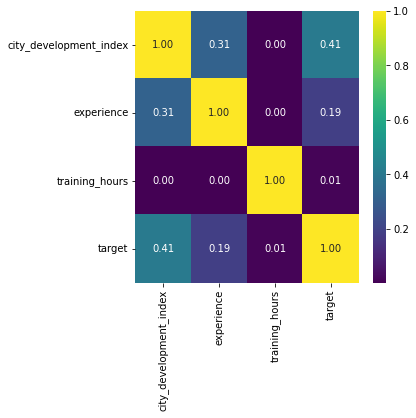

**3  Feature Selection**

**3.1 Categorical Feature Selection**

It is better and easier for machine learning algorithms to work with numbers instead of strings for example. Thus we encode our categories into numbers with each integer corresponds to a category. We do such a method for both training and test data.


We have some popular encoding approaches:

- Label encoding
- One-hot encoding
- Ordinal Encoding

For the response label we chose *Label encoding* and for the features we chose *Ordinal Encoding*.

**Label encoding:**  In general we replace the categorical value with a numeric value 1 for the class of interest and 0 for the class of non interest. In our case the class of interest would be employees willing to leave their current job.

**Ordinal Encoding:** We do the same as Label encoding by giving an integer for each category. However we preserve the original order of each category with regard to other categories.

So when it comes to our dataset, one of the features that has many different categories is the *city* feature which in turn will inflate its significance compared to the other features so it won't leave the chance to measure the importance of the other features. 

Eventually, its importance will be higher than any other feature however it's due to the high variance of the values within it.

Therefore, it's better to not take them into account while doing feature selection. 

This shows the importance/need for a well understanding of your dataset and domain knowledge.

We also drop all cities with a count number less than 2 as unique categories would lead to a high variance in our analysis which could affect it negatively.

In [ ]:
city = dataframe['city'].value_counts() 
dataframe=dataframe[dataframe.isin(city.index[city > 2]).values]
print('city feature values: ',(pd.unique(dataframe['city'])))
print('city feature non unique values: ',len(pd.unique(dataframe['city'])))

city feature values:  ['city_40' 'city_162' 'city_160' 'city_46' 'city_103' 'city_61' 'city_114'
 'city_159' 'city_100' 'city_21' 'city_16' 'city_104' 'city_83' 'city_64'
 'city_105' 'city_73' 'city_75' 'city_93' 'city_67' 'city_13' 'city_36'
 'city_71' 'city_57' 'city_65' 'city_11' 'city_136' 'city_97' 'city_50'
 'city_173' 'city_82' 'city_102' 'city_89' 'city_150' 'city_90' 'city_98'
 'city_28' 'city_115' 'city_94' 'city_165' 'city_142' 'city_12' 'city_43'
 'city_74' 'city_116' 'city_99' 'city_23' 'city_138' 'city_45' 'city_41'
 'city_72' 'city_19' 'city_101' 'city_20' 'city_106' 'city_10' 'city_157'
 'city_144' 'city_91' 'city_133' 'city_145' 'city_123' 'city_175'
 'city_128' 'city_167' 'city_84' 'city_54' 'city_126' 'city_77' 'city_81'
 'city_176' 'city_131' 'city_149' 'city_24' 'city_27' 'city_118'
 'city_152' 'city_141' 'city_76' 'city_70' 'city_143' 'city_78' 'city_53'
 'city_158' 'city_2' 'city_117' 'city_120' 'city_9' 'city_39' 'city_80'
 'city_155' 'city_179' 'city_37' 'city_

In [ ]:
city_development_index = dataframe['city_development_index'].value_counts() 
dataframe=dataframe[dataframe.isin(city_development_index.index[city_development_index > 2]).values]
print('city_development_index feature values: ',(pd.unique(dataframe['city_development_index'])))
print('city_development_index feature non unique of values: ',len(pd.unique(dataframe['city_development_index'])))

city_development_index feature values:  [0.776 0.767 0.92  0.762 0.913 0.926 0.843 0.887 0.624 0.91  0.924 0.923
 0.666 0.794 0.754 0.939 0.865 0.855 0.827 0.893 0.884 0.866 0.802 0.55
 0.897 0.925 0.896 0.878 0.693 0.804 0.698 0.949 0.789 0.903 0.727 0.64
 0.516 0.579 0.743 0.915 0.899 0.836 0.89  0.795 0.682 0.558 0.796 0.895
 0.769 0.84  0.691 0.742 0.555 0.738 0.527 0.921 0.856 0.479 0.83  0.73
 0.764 0.68  0.689 0.848 0.722 0.763 0.74  0.766 0.788 0.78  0.898 0.847
 0.556 0.512 0.725 0.739 0.563 0.775 0.647 0.824 0.448]
city_development_index feature non unique of values:  81


**3.1.1 Categorical Feature Selection Functions**

We convert our ordinal features into numerically encoded ones by using the below defined method. We do such encoding for both train and test sets.

In [ ]:
# prepare input data
def prepare_features(X_train, X_test):
	 oe = OrdinalEncoder()
	 oe.fit(X_train)
	 X_train_enc = oe.transform(X_train)
	 X_test_enc = oe.transform(X_test)
	 return X_train_enc, X_test_enc

Regarding the class label, we have a binary classification setting, so we need to map the two class labels to 0 and 1. We demonstrate for the sake of the project how label encoding is performed. However you may notice that our target variable is already encoded as 1.00 and 0.00 which is a float value thus merely transforming it into an integer is enough. However we demonstrate the power of label encoding as a toy example. We could also just use the OrdinalEncoder to achieve the same result, although the LabelEncoder is made to encode single variables. We apply LabelEncoding again on both training and test response variables.

In [ ]:
# prepare class label
def prepare_class_labels(y_train, y_test):
	 le = LabelEncoder()
	 le.fit_transform(y_train)
	 y_train_enc = le.transform(y_train)
	 y_test_enc = le.transform(y_test)
	 return y_train_enc, y_test_enc



**3.1.2 Categorical Data Splitting**

We now split our data into features and response variables at first, afterwards we split the training and test data into 67% for training data and 33% for test data. We then subset our categorical variables by selecting the categorical features for train and test data. We also do not include the city feature. Afterwards, we use the above defined methods to convert the categorical data into numerical ones using the OrdinalEncoder and LabelEncoder. We apply again our logic to both train and test sets.

In [ ]:
# Split train and target features
X = dataframe.drop('target', axis=1)
Y = dataframe['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

X_train_enc= X_train[['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type']]
X_test_enc= X_test[['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type']]
X_train_enc, X_test_enc=prepare_features(X_train_enc,X_test_enc)
X_train_enc = pd.DataFrame(X_train_enc, columns=['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type'])
X_test_enc = pd.DataFrame(X_test_enc, columns=['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_size','company_type'])


y_train_enc, y_test_enc=prepare_class_labels( y_train, y_test)

**3.1.3 Categorical Feature Selection Technique**

The Chi-Square is a hypothesis test, used when both the features categorical and the class label are categorical. The Chi-Square test is used to determine whether there is a correlation between any two categorical variables also. The Chi-Square test uses the p-value to decide whether the 2 categorical variables are correlated or not.
 
Chi-Square test assumes the following hypothesis:

Null Hypothesis (H0) :- There is no relationship between categorical feature and class label

Alternative Hypothesis (H1) :- There is a relationship between categorical feature and class label

If p-value ≥ 0.05, fail to reject the null hypothesis which means that there is no relationship between class label and categorical features.

If p_value < 0.05, reject the null hypothesis which means there is a relationship between class label and categorical features.

The Chi-Square test comes in handy when we have an imbalanced dataset as it does not make any assumptions about class label imbalances or anything.




Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type'],
      dtype='object')

gender                 0.972651
company_type           0.590412
company_size           0.089328
relevent_experience    0.010254
major_discipline       0.006955
enrolled_university    0.001605
education_level        0.001280
dtype: float64

variable: gender | p-value:  0.9726513516581552
variable: company_type | p-value:  0.5904122202146871
variable: company_size | p-value:  0.08932807481474388
variable: relevent_experience | p-value:  0.01025408495580023
variable: major_discipline | p-value:  0.006954558056984472
variable: enrolled_university | p-value:  0.0016050036792106682
variable: education_level | p-value:  0.0012797837778433978


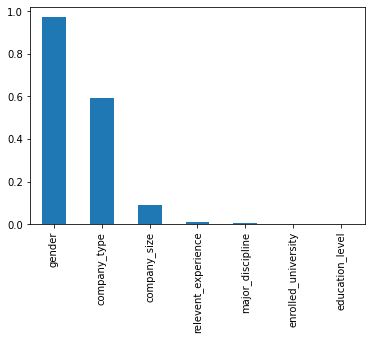

In [ ]:
f_score, pval = chi2(X_train_enc, y_train_enc)
display(pd.DataFrame(X_train_enc).columns)
p_values = pd.Series(pval,index = X_train_enc.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()
display(p_values)
for i in range(len(p_values)):
  print('variable:',p_values.index[i],'| p-value: ',p_values[i])
plt.show()


As agreed before, the features with a p-value < 0.05 will have a relationship with the class label. 

From the graph shown above, we can see that the features that have a relationship with the class label are:

- relevent_experience
- enrolled_university
- education_level
- major_discipline

Therefore, we can discard the rest of the categorical features.

**3.1.3.1 Drop less important categorical features**

What if we dropped the features that have a weak relationship with the class label and see the impact on our logistic regression model

In [ ]:
X_train_enc_copy=X_train_enc.copy()
X_test_enc_copy=X_test_enc.copy()
X_train_enc_copy=pd.DataFrame(X_train_enc_copy)
X_test_enc_copy=pd.DataFrame(X_test_enc_copy)

X_train_enc_copy.drop(['gender', 'company_size', 'company_type'], axis=1, inplace=True)
X_test_enc_copy.drop(['gender', 'company_size', 'company_type'], axis=1, inplace=True)

**3.1.4 Logistic Regression Model on Categorical Features**

Since our main target is to predict the candidate is willing to move to another job or not thus we used the Logistic regression model to help us in this prediction.

**What is Logistic Regression ?**

Logistic Regression is the modeling approach that can be used to describe the relationship between several input variables/predictors and a class label which is either 0 or 1.

In more detail, logistic regression predicts the probability of an outcome that can only have two values and then assigns to it a class label. If the probability is less than 0.5 then class 0 is assigned else class 1 is assigned.

Let's see the impact of the features that do not have a strong relationship with the class label on the Logistic Regression in terms of accuracy and other performance metrics.

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_enc_copy, y_train_enc)
predictions = lr.predict(X_test_enc_copy)
  
# print classification report
print(classification_report(y_test_enc, predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2641
           1       0.00      0.00      0.00       525

    accuracy                           0.83      3166
   macro avg       0.42      0.50      0.45      3166
weighted avg       0.70      0.83      0.76      3166



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**3.1.4.1 Logistic Regression Results Interpretation**

Let's interpret the above results.

---


The main objective of our calculations of the precision and recall is that the calculations **do not make use of the true negatives**, they are only concerned with the correct prediction of the class we are interested in, the class of people willing to leave their jobs.

**What is Precision ?**

Precision is the ratio between the True Positives and all the Positives.

Precision = True Positive / (True Positive + False Positive)

**What is Recall ?**

Recall is the measure of our model correctly identifying True Positives

Recall = True Positive / (True Positive + False Negative)

**What is Accuracy ?**

Accuracy is the ratio of the total number of *correct* predictions and the *total* number of predictions

Accuracy = (True Positive + True Negative ) / (True Positive + True Negative + False Positive + False Negative)

Utilizing accuracy as an important metric in our model is not easily understood. It is better to use Precision and Recall. It happens that the accuracy is very high while our precision or recall is low as it focuses on the True Negatives.

It's not critical to classify a data point as the minority class (class 1) when they belong to the majority class (class 0). This misclassification is called a *false positive*. But it's very critical not to misclassify a data point belonging to the majority class (class 0) to the majority class (class 1) as this would increase the HR's job in calling candidates who are not willing to leave their jobs. This misclassification is called **false negative**.

A *false negative* means the model predicted that a candidate is not leaving however he is leaving. A *false positive* means the model predicts candidate will leave when he actually isn't willing to leave his current job.




We can see in the above results the recall is 100% for class 0 which means that the model classifies all class 0 instances with 100%. On the other hand the model classifies class 1 with 0% which means it does not classify any true positive. Thus our model performs worse than just randomly guessing which is unwanted. This is due to the fact that most instances in our model are from class 0 as our data is imbalanced. The same logic could be applied to precision. The class distribution is skewed and biased towards class 0. That's why any data point is mostly classified as majority class.

We now introduce the *F1-score* metric which is a better metric than precision alone or recall alone. The F1-score does not depend on the *true negatives* in its calculations because an imbalanced dataset can have a very big number of true negative where the majority class is predicted correctly.

**F1-Score** is the mean between precision and recall metrics to determine the model's overall accuracy.

F1 = 2 X ( (Precision X Recall ) / (Precision + Recall) )

**3.2 Numerical Feature Selection**

We have made feature selection on the categorical features so let's do the same thing for the numerical features. Here we have used the ANOVA f-test to do feature selection for numerical features.

**3.2.1 Numerical Feature Selection Technique**

**ANOVA f-test Feature Selection**

ANOVA which means Analysis of Variance is a statistical technique that checks if there is a significance difference between the models by using the variance to check if the differences in groups are significant or not within the same feature. For example, if people from different cities with different city development indices tend to leave jobs more than other or not.

Variance is a metric that shows how far the data points are from the mean.
if the Variance value is low, this means that the features do not impact the class label.

The ANOVA assumes the following hypotheses.

Null Hypothesis (H0): Two means are equal

Alternative Hypothesis (H1): Two means are not equal

ANOVA is applied when there are three or more independent groups that need to be tested.

ANOVA is useful in feature selection as we get to know the significance of each feature in improving the model.




We subset our numerical data again and split them to train and split. We use the same splitting criteria from the categorical variables in order to preserve the same order and same observations in the dataframe.

In [ ]:
# Split train and target features
X_train_numeric= X_train[['city_development_index','experience','last_new_job','training_hours']]
X_test_numeric = X_test[['city_development_index','experience','last_new_job','training_hours']]

In [ ]:
F_score, p_value = f_classif(X_train_numeric, y_train_enc)

df = pd.DataFrame([F_score,p_value], index=['F-score','p-value'], columns=X_train_numeric.columns).T
df

,F-score,p-value
city_development_index,1366.266935,2.404186e-271
experience,241.929003,1.403407e-53
last_new_job,31.493310,2.084809e-08
training_hours,1.689593,1.937013e-01


Since the p-value < 0.05 thus the features have an impact on the class label.

These features are: 

- city_development_index

- experience

- last_new_job

**3.2.1.1 Drop less important Numerical Features**

We drop the feature *training_hours* as it has a p-value larger than 0.05.

In [ ]:
X_train_numeric.drop(['training_hours'], axis=1, inplace=True)

X_test_numeric.drop(['training_hours'], axis=1, inplace=True)

**3.2.2 Logistic Regression Model on Numerical Features**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_numeric, y_train_enc)
predictions = lr.predict(X_test_numeric)
  
# print classification report
print(classification_report(y_test_enc, predictions))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2641
           1       0.55      0.15      0.24       525

    accuracy                           0.84      3166
   macro avg       0.70      0.56      0.58      3166
weighted avg       0.80      0.84      0.80      3166



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**3.2.2.1 Logistic Regression Results Interpretation**

We can see in the above results the recall is 98% for class 0 which means that the model classifies all class 0 instances with 98%. On the other hand, the model classifies class 1 with 15% which means it only classifies 15% of the people who want to leave their jobs correctly. Again the model does not work well to identify people who want to leave their jobs. For numerical variables however we get a slight improvement in precision which means that the HR personal has a 55% chance in calling a candidate who actually wants to leave their job which is an improvement from the categorical features model. However 55% is merely better than just randomly guessing thus we need to do better. Again this is a result of the class distribution is skewed and biased towards class 0. That's why any data point is mostly classified as majority class.

**4 Merge of the Categorical & Numerical Datasets**

Now Let's merge the 2 dataframes (categorical & numerical) and see if our results get better a bit or not.

In [ ]:
X_train_enc=pd.DataFrame(X_train_enc)
y_train_enc=pd.DataFrame(y_train_enc)
X_test_enc=pd.DataFrame(X_test_enc)
y_test_enc=pd.DataFrame(y_test_enc)

X_train_enc.reset_index(drop=True, inplace=True)
y_train_enc.reset_index(drop=True, inplace=True)
X_test_enc.reset_index(drop=True, inplace=True)
y_test_enc.reset_index(drop=True, inplace=True)

X_train_numeric.reset_index(drop=True, inplace=True)
X_test_numeric.reset_index(drop=True, inplace=True)

dataframe_new_train = X_train_enc
dataframe_new_train['experience'] = X_train_numeric['experience']
dataframe_new_train['last_new_job'] = X_train_numeric['last_new_job']
dataframe_new_train['target']=y_train_enc
display(dataframe_new_train)

dataframe_new_test = X_test_enc
dataframe_new_test['experience'] = X_test_numeric['experience']
dataframe_new_test['last_new_job'] = X_test_numeric['last_new_job']
dataframe_new_test['target']=y_test_enc
display(dataframe_new_test)

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,experience,last_new_job,target
0,2.0,0.0,2.0,0.0,5.0,3.0,5.0,15,1,0
1,1.0,1.0,2.0,2.0,5.0,6.0,5.0,9,1,0
2,1.0,0.0,2.0,0.0,5.0,4.0,5.0,21,2,0
3,2.0,0.0,2.0,0.0,5.0,1.0,5.0,16,0,0
4,1.0,0.0,2.0,0.0,5.0,3.0,5.0,21,5,0
...,...,...,...,...,...,...,...,...,...,...
6421,1.0,1.0,0.0,0.0,5.0,1.0,5.0,0,1,0
6422,1.0,0.0,2.0,1.0,3.0,4.0,5.0,5,1,0
6423,0.0,0.0,2.0,0.0,2.0,4.0,5.0,3,3,0
6424,1.0,0.0,2.0,0.0,5.0,7.0,5.0,21,2,0


,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,experience,last_new_job,target
0,1.0,0.0,2.0,0.0,5.0,3.0,5.0,6,1,0
1,1.0,0.0,2.0,0.0,5.0,0.0,1.0,10,1,0
2,1.0,0.0,2.0,0.0,5.0,4.0,5.0,11,1,0
3,1.0,0.0,2.0,0.0,5.0,3.0,5.0,13,5,1
4,1.0,1.0,2.0,0.0,5.0,1.0,5.0,13,2,0
...,...,...,...,...,...,...,...,...,...,...
3161,1.0,0.0,2.0,1.0,3.0,4.0,5.0,6,1,1
3162,1.0,0.0,2.0,0.0,5.0,6.0,5.0,15,5,0
3163,1.0,0.0,2.0,2.0,5.0,1.0,5.0,12,1,0
3164,1.0,0.0,2.0,0.0,2.0,1.0,1.0,6,2,1


**5  Working with imbalanced dataset**

As we have mentioned above, while explaining the confusion matrix, our data is imbalanced and that's why the recall is almost 100%. So let's balance our data to have more accurate and precise results from our model.

the dataset contains 8054 records of the majority class (class 0) which we are not interested in and 1553 records of the minority class (class 1) which we are interested in. Therefore, our class label distribution is skewed and our model is biased

In [ ]:
# summarize class distribution
counter = Counter(Y)
print(counter)

Counter({0.0: 8043, 1.0: 1549})


**5.1 Balancing Dataset Techniques**

Many techniques can be used to balance our data and the most popular one is **Data Sampling**. 

**Data Sampling** 

Data sampling is divided into 2 categories: oversampling and undersampling techniques. 

Sampling should be done on the training dataset.

**What is Oversampling ?**

Oversampling produces new data points or duplicates the data points that belong to the minority class. 

Common Oversampling Techniques:

- Random Oversampling (AKA sampling with replacement)

- synthetic minority oversampling technique (SMOTE) (*the most popular one*)

**What is Undersampling ?**

Undersampling performs by deleting some data points that belong to the majority class.

Common Oversampling Techniques:

- Random Undersampling

- Near Miss Undersampling


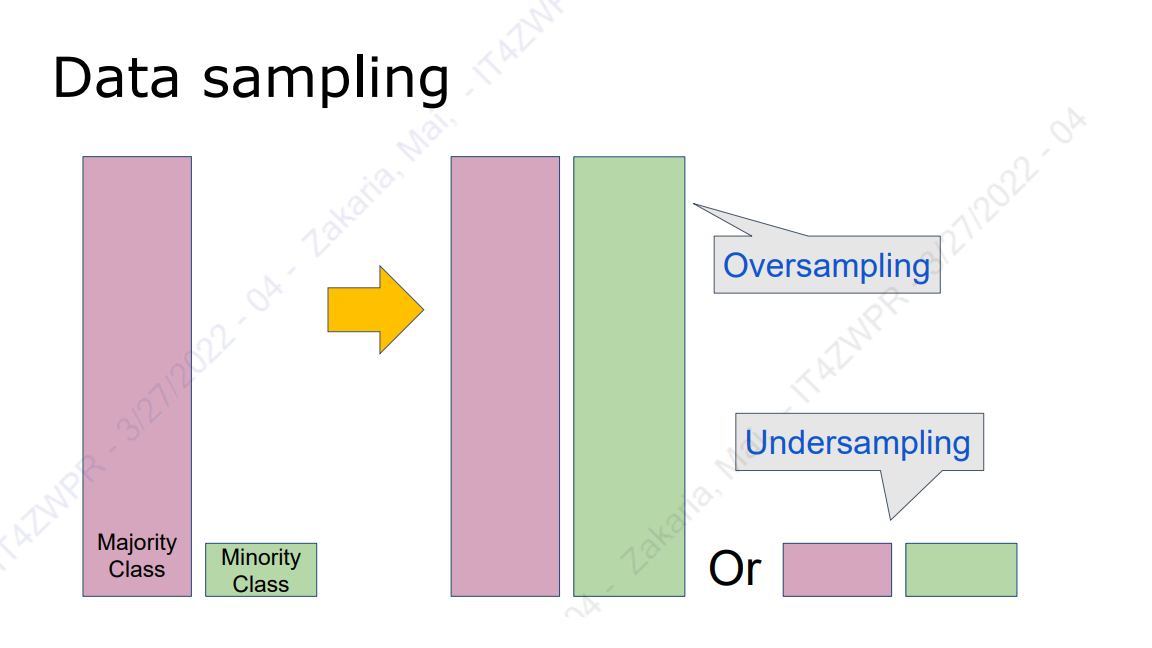

**5.1.1 Oversampling Technique**

We decided to do oversampling using the most popular & successful technique: synthetic minority oversampling technique **(SMOTE)**

**What is SMOTE ?**

SMOTE is an oversampling technique that selects data points randomly from the dataset then draw a line between them and assigns a data point on that line.

Let's apply it to our training dataset.

In [ ]:
X_train_df = dataframe_new_train.drop('target', axis=1)
Y_train_df = dataframe_new_train['target']

X_test_df=dataframe_new_test.drop('target',axis=1)
Y_test_df=dataframe_new_test['target']

Firstly, we compare the total number of data points that belong to class 1 and class 0 before and after applying SMOTE technique.

In [ ]:
print("Before OverSampling, total of class '1': {}".format(sum(Y_train_df == 1)))
print("Before OverSampling, total of class '0': {} \n".format(sum(Y_train_df == 0)))

sm = SMOTE(random_state = 3)
X_train_res, y_train_res = sm.fit_resample(X_train_df, Y_train_df.ravel())

print('After OverSampling, X_train_df shape: {}'.format(X_train_res.shape))
print('After OverSampling, Y_train_df shape: {} \n'.format(y_train_res.shape))

print("After OverSampling, total of class '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, total of class '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, total of class '1': 1024
Before OverSampling, total of class '0': 5402 

After OverSampling, X_train_df shape: (10804, 9)
After OverSampling, Y_train_df shape: (10804,) 

After OverSampling, total of class '1': 5402
After OverSampling, total of class '0': 5402


**5.1.1.1 Oversampling Results Interpretation**

As we can see above the number of data points that belong to class 1 has increased and become equal to the number of data points that belong to class 0. Now we can consider that our class label distribution is normally distributed so let's see the impact of this on our model in terms of accuracy and performance metrics.

**5.1.1.2 Logistic Regression on Oversampled Dataset**

In [ ]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test_df)
  
# print classification report
print(classification_report(Y_test_df, predictions))

              precision    recall  f1-score   support

           0       0.89      0.58      0.70      2641
           1       0.23      0.62      0.33       525

    accuracy                           0.58      3166
   macro avg       0.56      0.60      0.52      3166
weighted avg       0.78      0.58      0.64      3166



** *italicized text*5.1.1.2.1 Logistic Regression Results Interpretation**

Since our data became balanced so the f1-score metric wouldn't be a strong reference as the accuracy and the recall or precision.
The recall of class 1 is now slightly close to the recall of class 0 however the accuracy has decreased but this means that our model is not biased anymore so we can try another model on our balanced dataset to improve the accuracy a little bit. But first, let's do undersampling then see its impact on our model as well

**5.1.2 Undersampling Technique**

**Undersampling**

We decided to do undersampling using the *Near Miss Undersampling* technique 

**What is Near Miss Undersampling technique ?**

Near Miss undersampling is based on the kNN algorithm. The algorithm keeps on deleting data points from the larger class when two data points from different classes have the smallest average distance to the minor class.

Let's apply it to our training dataset.

In [ ]:
print("Before Undersampling, total of class '1': {}".format(sum(Y_train_df == 1)))
print("Before Undersampling, total of class '0': {} \n".format(sum(Y_train_df == 0)))

nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train_df, Y_train_df.ravel())

print('After Undersampling, X_train_df shape: {}'.format(X_train_miss.shape))
print('After Undersampling, Y_train_df shape: {} \n'.format(y_train_miss.shape))

print("After Undersampling, total of class '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, total of class '0': {}".format(sum(y_train_miss == 0)))


Before Undersampling, total of class '1': 1024
Before Undersampling, total of class '0': 5402 

After Undersampling, X_train_df shape: (2048, 9)
After Undersampling, Y_train_df shape: (2048,) 

After Undersampling, total of class '1': 1024
After Undersampling, total of class '0': 1024


**5.1.2.1 Undersampling Results Interpretation**

As we can see above the number of data points that belong to class 0 has decreased and become equal to the number of datapoints that belong to class 1. Now we can consider that our class label distribution is normally distributed so let's see the impact of this on our model in terms of accuracy and performance metrics.

**5.1.2.2 Logistic Regression on Undersampled Dataset**

In [ ]:
lr1 = LogisticRegression()
lr1.fit(X_train_miss, y_train_miss.ravel())
predictions = lr1.predict(X_test_df)
  
# print classification report
print(classification_report(Y_test_df, predictions))

              precision    recall  f1-score   support

           0       0.85      0.43      0.57      2641
           1       0.18      0.62      0.27       525

    accuracy                           0.46      3166
   macro avg       0.51      0.52      0.42      3166
weighted avg       0.74      0.46      0.52      3166



**5.1.2.2.1 Logistic Regression Results Interpretation**

The accuracy resulting from our model after we have applied undersampling on our data is 46% which is worse than the one that resulted from our model after we have applied oversampling which was 58%. Thus, we will stick to the oversampling technique (*SMOTE*) we have done before since its impact on our model resulted in better accuracy.

**6 Random Forests Technique**

As we want to improve our model results in terms of accuracy and other performance metrics so let's try another model which is very popular & powerful as well called *Random Forests*. 

**Why did I choose Random Forests specifically ?**

I chose Random Forests because it does internally feature selection so that would emphasize to us that the features we have selected before balancing our data are the most contributing features to the class label

Random Forests is considered a supervised learning technique. One of its biggest advantages is that it can be used for regression and classification as well.

Random Forests works by comprising the maximum number of decision trees so it ends with a strong and accurate forest. Random Forests are considered as an ensemble method that is based on bagging or bootstrapping + aggregating. How it internally works is that it builds multiple decision trees on boostrapped subsamples of the data. Afterwards, a subset of the columns also is chosen in each tree. The tree is built and the response variable with the highest decision with the most votes is chosen. By aggregating or choosing the number of columns arbitrary feature selection comes in included implicitly.


**6.1 Random Forests applied on our Balanced Dataset**

At first, let's apply random forests on our balanced dataset then compare the confusion metrics of the logistic regression model with the confusion metrics of the random forests model

In [ ]:
clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X_train_res, y_train_res)

y_pred=clf.predict(X_test_df)
print(classification_report(Y_test_df, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2641
           1       0.24      0.21      0.22       525

    accuracy                           0.76      3166
   macro avg       0.54      0.54      0.54      3166
weighted avg       0.75      0.76      0.75      3166



**6.1.1 Random Forests Results Interpretation**

As we can see from the above confusion matrix that the accuracy of the random forests algorithm is way better than the one of the logistic regression where random forests accuracy is 76% while logistic regression has an accuracy of 58%. It is interesting to see that our hand picked logistic regression model returns a recall for class 1 of 62% while the random forest has 22% recall. This means that the logistic regression predicts the people who would leave their jobs with a higher rate than the random forest. Both random forests and logistic regression have nearly the same percision rates.


#7. Discussion

At the end of our two reports we find out the the significant variables regarding the logistic regression are *city_development_index*,*experience*,*last_new_job*, *gender*, *relevent_experience*, *enrolled_university*,    *education_level*, *major_discipline*, *company_size*, *company_type*. We also evaluate the different metrics and find out the logistic regression model after data balancing is the model we would suggest HR to use in order to predict the decision of candidates as it had given us the highest recall rates for both class 0 and class 1. We also find out that the chi-squared test is insensitive to imbalanced data.

Thus we purpose for future reports and analysis to try to incorporate cross-validation techniques and maybe explore which ensemble methods such as Xg-Boost and AdaBoost may perform better than random forests for such dataset. Also future work may take into consideration the current salary for each candidate and predict the expected salary as well.


# 8. Conclusion

All in all, We have explored the HR dataset provided by the company in order to understand which factors affect the decision of moving from the current job and building a predictive model to classify candidates. We have at first chosen which features contribute to the prediction of a candidates' decision using hypothesis testing. Next, we started running our two machine learning models which are logistic regression and random forests on the unbalanced data to show how bad the model performs on it. Furthermore, we balance the data using undersampling and oversampling techniques. Lastly, we re-run our models and compare the metrics to before doing the balancing of data. 

# 9. References


1. A. Navlani. Understanding Random Forests Classifiers in Python Tutorial, 2018. https://www.datacamp.com/community/tutorials/random-forests-classifier-python


2. Great Learning Team. Label Encoding in Python Explained, 2021. https://www.mygreatlearning.com/blog/label-encoding-in-python/


3. Handling Imbalanced Data with SMOTE and Near Miss Algorithm in Python, 2021. https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

4.  J. Brownlee. How to Choose a Feature Selection Method For Machine Learning, 2019.  https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

5. J. Brownlee. How to Perform Feature Selection with Categorical Data, 2019.  https://machinelearningmastery.com/feature-selection-with-categorical-data/


6. Möbius. HR Analytics: Job Change of Data Scientists, 2021. https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists

7.  S. Gajawada. ANOVA for Feature Selection in Machine Learning, 2019.  https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476



8. S. Goswami. Using the Chi-Squared test for feature selection with implementation, 2020. https://towardsdatascience.com/using-the-chi-squared-test-for-feature-selection-with-implementation-b15a4dad93f1
